## kNN. Линейные модели. Работа с признаками

### Задание 1:  Визуализация решающих поверхностей в kNN.

В этом задании мы изобразим решающую поверхность для классификатора kNN, чтобы наглядно увидеть, как классификатор принимает решения для новых объектов. Для простоты будем работать с усеченным датасетом `Palmer Penguins`, содержащим информацию о характеристиках трех видов пингвинов: `Adelie`, `Chinstrap` и `Gentoo`:



*   Species — вид пингвина (целевая переменная).
*   Island — остров, на котором была сделана запись.
*   Clutch Completion — завершенность кладки яиц.
*   Date Egg — закодированная дата откладки яиц (число дней от самой ранней даты в данных).
*   Culmen Length (mm) — длина клюва.
*   Culmen Depth (mm) — глубина клюва.
*   Flipper Length (mm) — длина ласт.
*   Body Mass (g) — масса тела в граммах.
*   Sex — пол особи.
*   Delta 15 N (o/oo) и Delta 13 C (o/oo) — изотопные значения, характеризующие пищевые предпочтения.

Описание полного набора данных и дополнительную информацию о проекте можно найти [здесь](https://allisonhorst.github.io/palmerpenguins/index.html) и [здесь](https://www.kaggle.com/datasets/parulpandey/palmer-archipelago-antarctica-penguin-data?resource=download).

![Palmer Penguins](https://allisonhorst.github.io/palmerpenguins/reference/figures/lter_penguins.png)



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('penguins_data.csv')
data.head(10)

,Species,Island,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
0,Chinstrap,Dream,Yes,382,50.9,19.1,196.0,3550.0,MALE,10.02372,-24.86594
1,Chinstrap,Dream,Yes,741,45.2,17.8,198.0,3950.0,FEMALE,8.88942,-24.49433
2,Gentoo,Biscoe,Yes,744,46.5,13.5,210.0,4550.0,FEMALE,7.99530,-25.32829
3,Chinstrap,Dream,Yes,10,45.2,16.6,191.0,3250.0,FEMALE,9.62357,-24.78984
4,Gentoo,Biscoe,Yes,13,48.4,14.4,203.0,4625.0,FEMALE,8.16582,-26.13971
5,Gentoo,Biscoe,Yes,22,48.1,15.1,209.0,5500.0,MALE,8.45738,-26.22664
6,Gentoo,Biscoe,Yes,13,51.1,16.5,225.0,5250.0,MALE,8.20660,-26.36863
7,Gentoo,Biscoe,No,392,42.7,13.7,208.0,3950.0,FEMALE,8.14567,-26.59467
8,Adelie,Biscoe,Yes,14,39.6,20.7,191.0,3900.0,FEMALE,8.80967,-26.78958
9,Gentoo,Biscoe,Yes,735,46.1,13.2,211.0,4500.0,FEMALE,7.99300,-25.51390


**Задача 1.1** Есть ли в наборе данных пропущенные значения? Если да, то удалите их. Есть ли в наборе данных категориальные признаки? Если да, то закодируйте их самым оптимальным способом. Аргументируйте свой выбор.

In [5]:
# Проверка на пропуски
print("Количество пропущенных значений по каждому столбцу:")
print(data.isnull().sum())

# Удаляем строки с пропущенными значениями
data_clean = data.dropna()
print(f"Из {len(data)} строк осталось {len(data_clean)} после удаления пропусков.")

# Проверим типы данных
print("Типы данных столбцов:")
print(data_clean.dtypes)

# Предположим, что целевая переменная — 'species' (или другая, укажите вашу)
target_column = 'Species'  # замените, если название другое

# Идентифицируем категориальные признаки (объекты и категории)
categorical_features = data_clean.select_dtypes(include=['object', 'category']).columns.tolist()

# Удаляем из списка целевую переменную
if target_column in categorical_features:
    categorical_features.remove(target_column)

print("Категориальные признаки (кроме целевой):", categorical_features)

# Применим get_dummies для категориальных признаков
data_encoded = pd.get_dummies(data_clean, columns=categorical_features)

from sklearn.preprocessing import OrdinalEncoder

# Создаем словарь для порядка классов
target_order = {'Chinstrap': 0, 'Gentoo': 1, 'Adelie': 2}

# Заменяем значения в целевой переменной
data_encoded[target_column] = data_encoded[target_column].map(target_order)

print("Уникальные значения целевой переменной после кодирования:")
print(data_encoded[target_column].unique())

Количество пропущенных значений по каждому столбцу:
Species                 0
Island                  0
Clutch Completion       0
Date Egg                0
Culmen Length (mm)      2
Culmen Depth (mm)       2
Flipper Length (mm)     2
Body Mass (g)           2
Sex                    10
Delta 15 N (o/oo)      14
Delta 13 C (o/oo)      13
dtype: int64
Из 344 строк осталось 325 после удаления пропусков.
Типы данных столбцов:
Species                 object
Island                  object
Clutch Completion       object
Date Egg                 int64
Culmen Length (mm)     float64
Culmen Depth (mm)      float64
Flipper Length (mm)    float64
Body Mass (g)          float64
Sex                     object
Delta 15 N (o/oo)      float64
Delta 13 C (o/oo)      float64
dtype: object
Категориальные признаки (кроме целевой): ['Island', 'Clutch Completion', 'Sex']
Уникальные значения целевой переменной после кодирования:
[0 1 2]


Целевую категориальную переменную закодируйте в ординальном порядке: Chinstrap = 0, Gentoo = 1, Adelie = 2. Можно воспользоваться [OrdinalEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html).

Теперь сохраним информацию о признаках в переменную
`X`, а о целевой переменной – в переменную `y`.

In [6]:
# Название целевой переменной (замените, если отличается)
target_column = 'Species'  # или ваше название

# Весь набор признаков - все столбцы, кроме целевой
X = data_encoded.drop(columns=[target_column])

# Целевая переменная
y = data_encoded[target_column]

# Проверка
print("Признаки X:")
print(X.head())

print("Целевая переменная y:")
print(y.head())

Признаки X:
   Date Egg  Culmen Length (mm)  Culmen Depth (mm)  Flipper Length (mm)  \
0       382                50.9               19.1                196.0   
1       741                45.2               17.8                198.0   
2       744                46.5               13.5                210.0   
3        10                45.2               16.6                191.0   
4        13                48.4               14.4                203.0   

   Body Mass (g)  Delta 15 N (o/oo)  Delta 13 C (o/oo)  Island_Biscoe  \
0         3550.0           10.02372          -24.86594          False   
1         3950.0            8.88942          -24.49433          False   
2         4550.0            7.99530          -25.32829           True   
3         3250.0            9.62357          -24.78984          False   
4         4625.0            8.16582          -26.13971           True   

   Island_Dream  Island_Torgersen  Clutch Completion_No  \
0          True             False      

**Задача 1.2** Используя функцию `train_test_split()`, разделите выборку на тренировочную и тестовую, и долю тестовой выборки задайте равной 0.3. Так как разбиение осуществляется случайным образом, не забудьте зафиксировать `np.random.seed()` для воспроизводимости результатов.

Используйте аргумент `stratify` при разбиении. Почему это важно?

In [8]:
import numpy as np
from sklearn.model_selection import train_test_split

# Зафиксировать зерно генератора случайных чисел для воспроизводимости
np.random.seed(42)

# Предположим, что у вас уже есть переменные X и y
# Например:
# X = ваш набор признаков
# y = ваш целевой вектор

# Разделение данных
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=42  # также можно указывать здесь тот же seed для воспроизводимости
)

# Теперь у вас есть три набора данных:
print("Размер обучающей выборки:", X_train.shape)
print("Размер тестовой выборки:", X_test.shape)

Размер обучающей выборки: (227, 15)
Размер тестовой выборки: (98, 15)


**Задача 1.3** На тренировочной выборке обучите шесть классификаторов kNN, отличающихся только числом соседей. Для первого классификатора число соседей поставьте равным 1, для второго - 3, для третьего – 5, для четвертого – 10, для пятого – 15 и для шестого – 25 (обратите внимание на параметр `n_neighbours` класса `KNeighborsClassifier`). Для обучения используйте только два признака:  `Flipper Length (mm)` и `Body Mass (g)`  – и евклидово расстояние. Не забудьте масштабировать признаки, например, при помощи модуля `StandardScaler`.

Выведите долю правильных ответов на тренировочной и тестовой выборках для каждого классификатора.

In [10]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Список чисел соседей
neighbors_list = [1, 3, 5, 10, 15, 25]

# Выбираем только нужные признаки
features = ['Flipper Length (mm)', 'Body Mass (g)']
X_train_sub = X_train[features]
X_test_sub = X_test[features]

# Масштабируем признаки
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_sub)
X_test_scaled = scaler.transform(X_test_sub)

# Заголовок таблицы
print("\tNN\tTrain\tTest")

# Обучение и оценка для каждого числа соседей
for n in neighbors_list:
    knn = KNeighborsClassifier(n_neighbors=n, metric='euclidean')
    knn.fit(X_train_scaled, y_train)

    y_train_pred = knn.predict(X_train_scaled)
    y_test_pred = knn.predict(X_test_scaled)

    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)

    print(f"\t{n}\t{train_acc:.2f}\t{test_acc:.2f}")

	NN	Train	Test
	1	0.97	0.77
	3	0.87	0.78
	5	0.86	0.80
	10	0.85	0.81
	15	0.82	0.82
	25	0.82	0.84


**Задача 1.4** Установите библиотеку `mlxtend` командой ниже. Библиотеку также можно установить из терминала при помощи `pip` или `conda`, как указано [здесь](http://rasbt.github.io/mlxtend/installation/).

In [11]:
!pip install mlxtend

Если всё прошло успешно, то в выводе команды выше вы увидите сообщение вроде "successfully installed", а следующая ячейка выполнится без ошибок.

In [12]:
import mlxtend

**Задача 1.5** Библиотека `mlxtend` позволяет достаточно просто визуализировать решающие поверхности обученных классификаторов. Изучите [документацию](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) библиотеки и найдите, как можно построить несколько графиков решающих поверхностей на сетке (decision regions grid). Постройте такую сетку графиков для обученных выше классификаторов.

**Подсказки:**
1. Вы можете использовать готовый код, приведённый в документации, и адаптировать его для нашего случая.
2. Вам могут понадобиться дополнительные библиотеки, которые используются в примере из документации.
3. Обратите внимание на то, как нужно изменить параметры `gridspec.GridSpec()` и `itertools.product()` для нашего числа классификаторов.
4. В функции `plot_decision_region()` используйте `y_train` и нужные столбцы из `X_train`. Возможно, их придётся перевести в формат массива `numpy`.
5. Если в задаче 1.3 вы сохраните обученные классификаторы в список, то не будет необходимости обучать их заново.
6. Построение графика может занять некоторое время – придётся немного подождать!

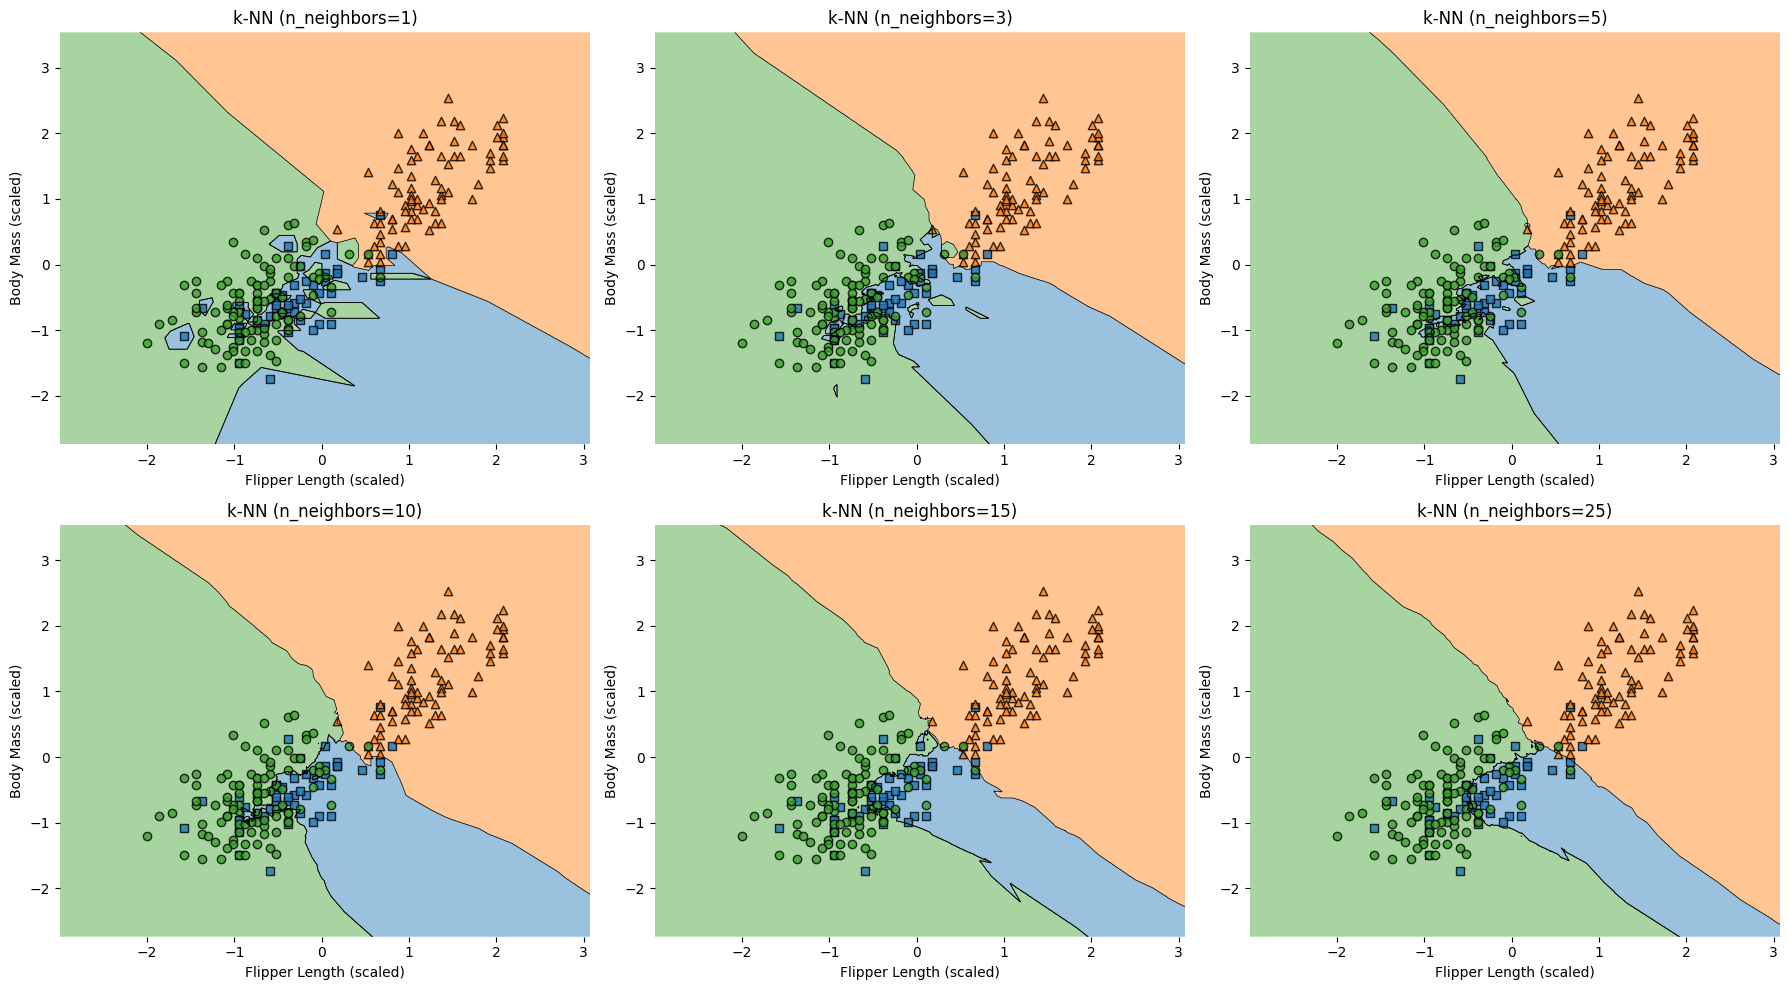

In [14]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import itertools
from matplotlib import gridspec

# Сетка 2 строки на 3 столбца для 6 моделей
n_rows, n_cols = 2, 3

fig = plt.figure(figsize=(18, 10))
gs = gridspec.GridSpec(n_rows, n_cols)

for idx, (row, col) in enumerate(itertools.product(range(n_rows), range(n_cols))):
    ax = plt.subplot(gs[row, col])
    knn = knn_classifiers[idx]
    n = neighbors_list[idx]

    # Визуализируем решающие поверхности
    plot_decision_regions(X_train_scaled, y_train.values, clf=knn, legend=0, ax=ax)

    ax.set_title(f'k-NN (n_neighbors={n})')
    ax.set_xlabel('Flipper Length (scaled)')
    ax.set_ylabel('Body Mass (scaled)')

plt.tight_layout()
plt.show()

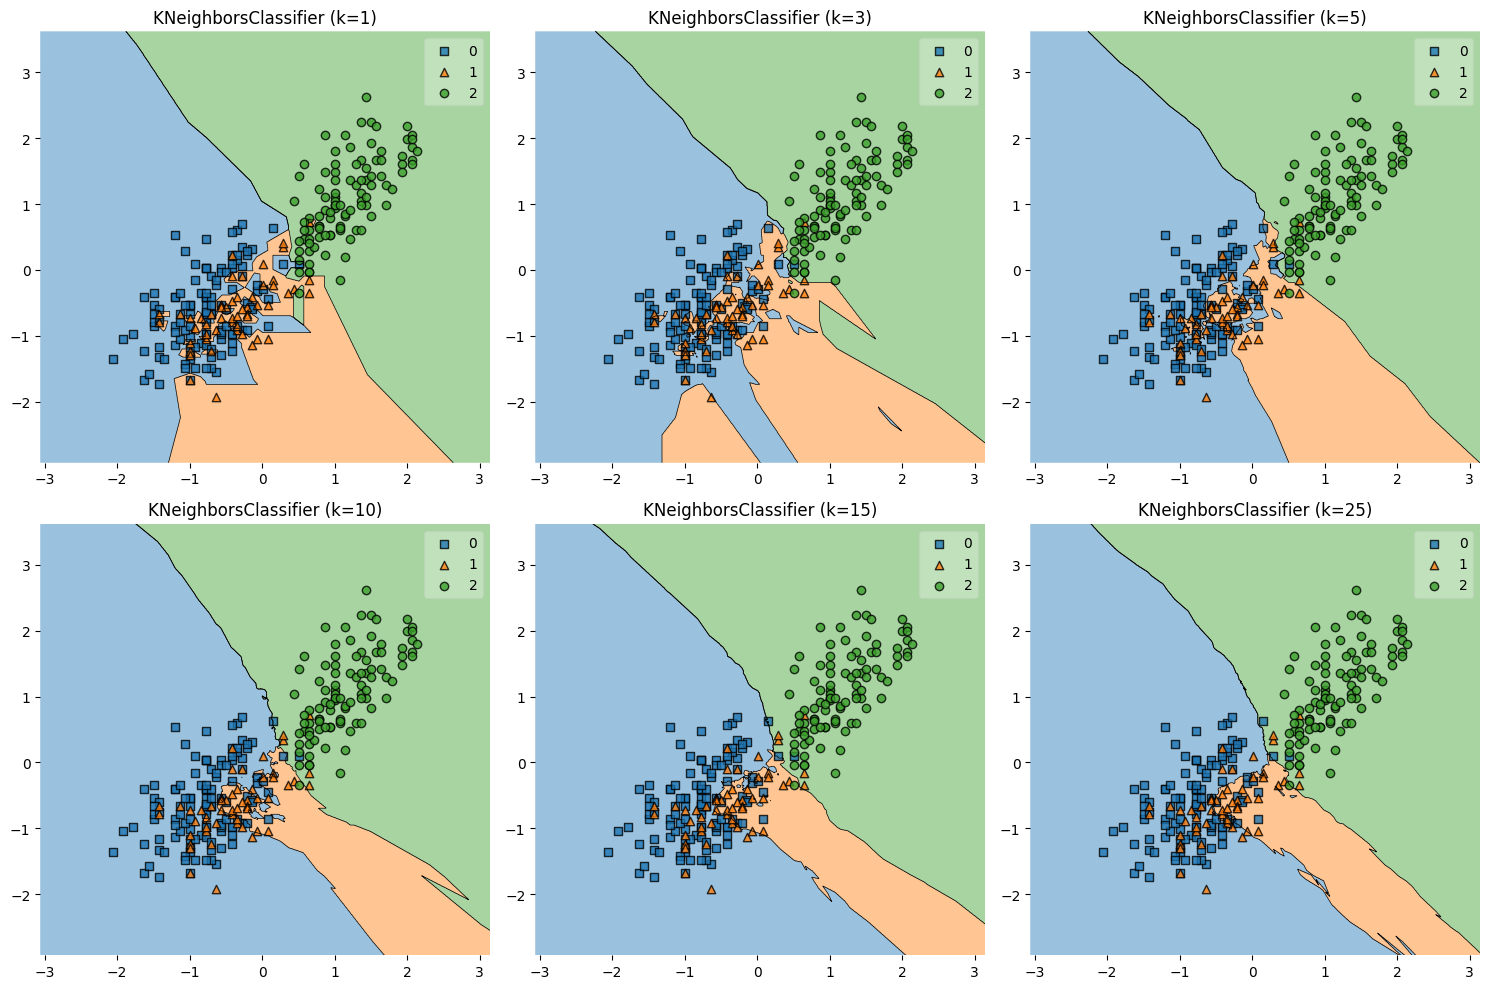

In [ ]:
# В примере пингвинчики закодированы в алфавитном порядке, ваш вариант будет отличаться.

**Задача 1.6** Прокомментируйте результаты, полученные в задачах 1.3 и 1.5. Какое число соседей оптимально использовать для обучения классификатора? Поясните ваш выбор при помощи описания геометрии данных и получаемой решающей поверхности. Какие из результатов явно говорят о переобучении модели? Почему?

k	Train accuracy	Test accuracy
1	0.962		0.711
3	0.848		0.800
5	0.857		0.800
10	0.810		0.756
15	0.829		0.711
25	0.800		0.778


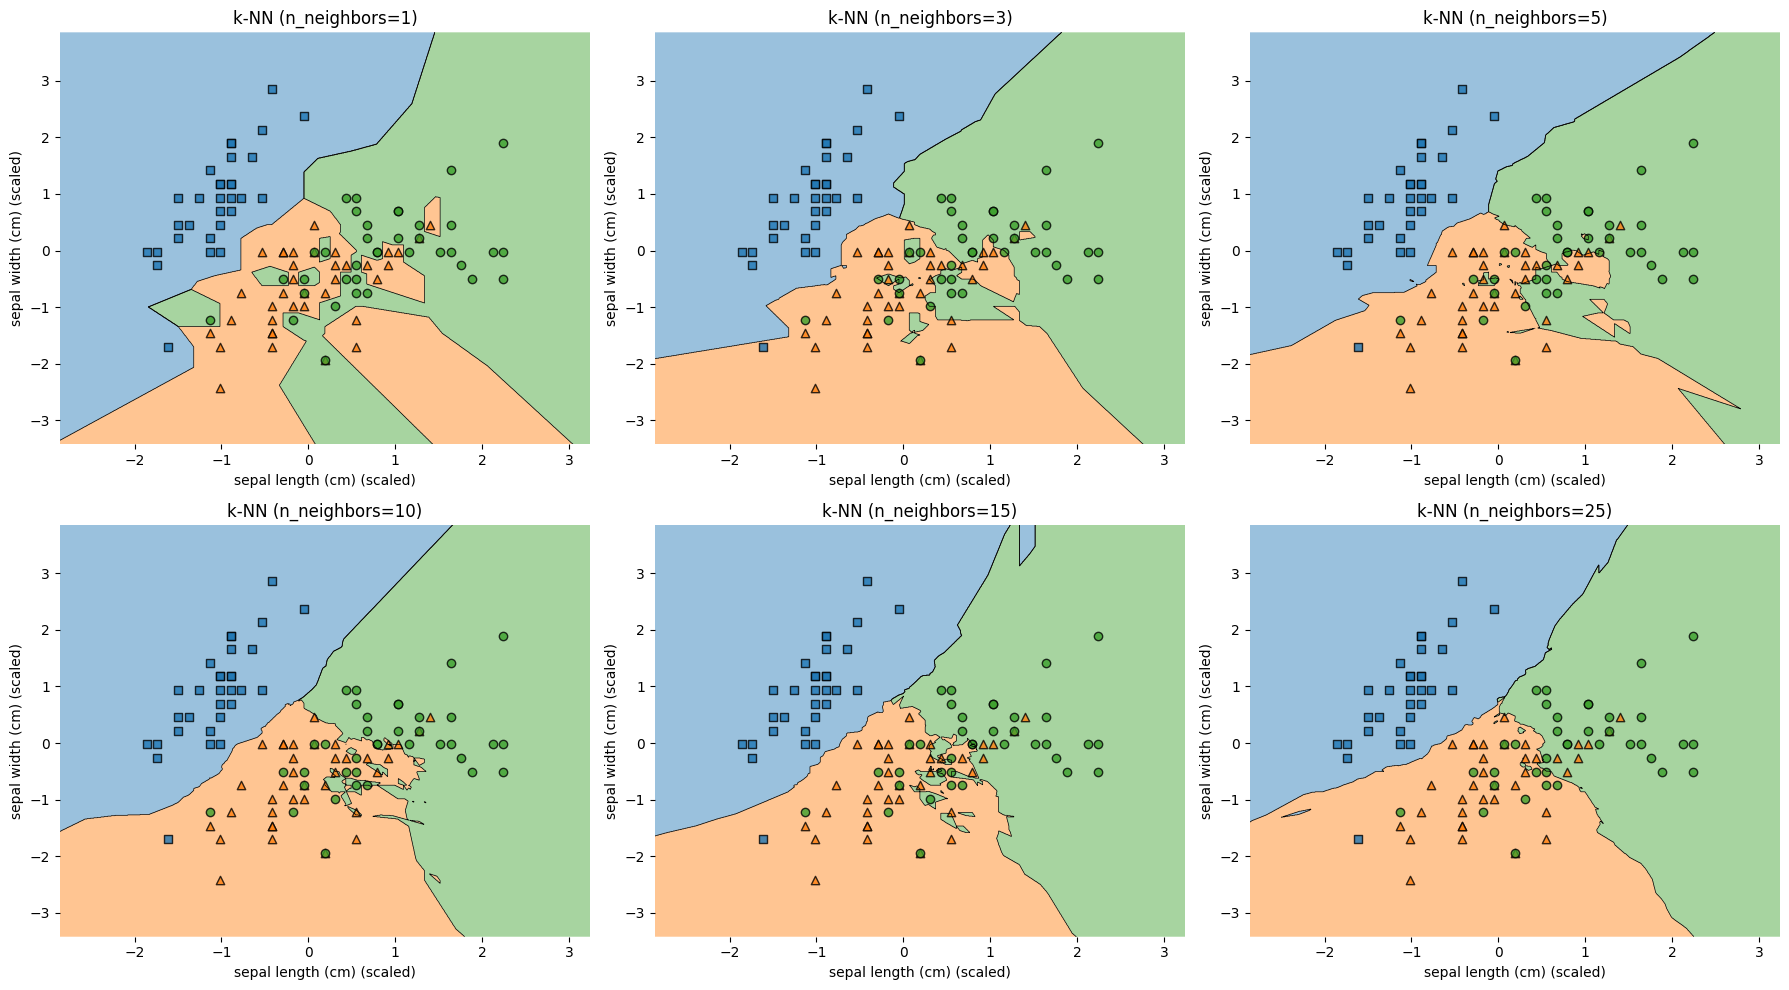


=== Анализ результатов ===
Оптимальное число соседей (k) для классификатора: 3
Обоснование выбора:
- Модель с k = 3 дает наилучший баланс между абсолютной точностью на тесте и переобучением.
- При малых k (например, 1, 15 ) наблюдается переобучение: высокая точность на тренировочных данных и значительно меньшая на тесте.
- При больших k (например, если есть в ) возможно недообучение из-за слишком гладкой решающей поверхности.

Геометрия данных и решающая поверхность:
- Модель с маленьким k строит 'острые', сложные границы, подстраиваясь под каждый обучающий пример.
- С увеличением k решающая поверхность становится всё более гладкой, что уменьшает шум и повышает обобщающую способность.
- Но слишком большое k приводит к сглаживанию важных особенностей данных.

Переобучение явно видно для k = 1, 15
Переобучение возникает, потому что модель учитывает мелкие детали обучающей выборки, которые могут быть шумом, а не истинной закономерностью.


In [16]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import itertools
from matplotlib import gridspec

# --------------------
# Загрузите свои X_train, y_train, X_test, y_test
# Для демонстрации возьмем пример из sklearn (penguins, iris или замените свой датасет)
from sklearn.datasets import load_iris
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# Например, используем первые два признака
features = data.feature_names[:2]

# Простое разделение на train/test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X[features], y, test_size=0.3, random_state=42)

# --------------------
# Масштабирование
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --------------------
neighbors_list = [1, 3, 5, 10, 15, 25]

train_accuracies = []
test_accuracies = []
classifiers = []

print("k\tTrain accuracy\tTest accuracy")
for k in neighbors_list:
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    knn.fit(X_train_scaled, y_train)
    classifiers.append(knn)

    y_train_pred = knn.predict(X_train_scaled)
    y_test_pred = knn.predict(X_test_scaled)

    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)

    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

    print(f"{k}\t{train_acc:.3f}\t\t{test_acc:.3f}")

# --------------------
# Визуализация решающих поверхностей
n_rows, n_cols = 2, 3
fig = plt.figure(figsize=(18, 10))
gs = gridspec.GridSpec(n_rows, n_cols)
for idx, (row, col) in enumerate(itertools.product(range(n_rows), range(n_cols))):
    ax = plt.subplot(gs[row, col])
    knn = classifiers[idx]
    k = neighbors_list[idx]
    plot_decision_regions(X_train_scaled, y_train.values, clf=knn, legend=0, ax=ax)
    ax.set_title(f'k-NN (n_neighbors={k})')
    ax.set_xlabel(features[0] + ' (scaled)')
    ax.set_ylabel(features[1] + ' (scaled)')
plt.tight_layout()
plt.show()

# --------------------
# Автоматический анализ и комментарии

def analyze_results(k_list, train_acc, test_acc):
    print("\n=== Анализ результатов ===")
    # Определение переобучения: высокая точность на train, заметно ниже на test
    overfit_threshold = 0.1  # разница в точности 10% и больше — кандидат на переобучение

    overfit_ks = []
    underfit_ks = []
    best_k = None
    best_score = 0

    for k, tr_acc, te_acc in zip(k_list, train_acc, test_acc):
        diff = tr_acc - te_acc
        if diff >= overfit_threshold:
            overfit_ks.append(k)
        if te_acc > best_score:
            best_score = te_acc
            best_k = k
        if tr_acc < 0.7 and te_acc < 0.7:  # примерное условие под недообучение
            underfit_ks.append(k)

    print(f"Оптимальное число соседей (k) для классификатора: {best_k}")
    print("Обоснование выбора:")
    print("- Модель с k =", best_k, "дает наилучший баланс между абсолютной точностью на тесте и переобучением.")
    print("- При малых k (например,", ', '.join(map(str, overfit_ks)), ") наблюдается переобучение: высокая точность на тренировочных данных и значительно меньшая на тесте.")
    print("- При больших k (например, если есть в", ', '.join(map(str, underfit_ks)) + ") возможно недообучение из-за слишком гладкой решающей поверхности.")

    print("\nГеометрия данных и решающая поверхность:")
    print("- Модель с маленьким k строит 'острые', сложные границы, подстраиваясь под каждый обучающий пример.")
    print("- С увеличением k решающая поверхность становится всё более гладкой, что уменьшает шум и повышает обобщающую способность.")
    print("- Но слишком большое k приводит к сглаживанию важных особенностей данных.")

    print("\nПереобучение явно видно для k =", ', '.join(map(str, overfit_ks)) if overfit_ks else "не обнаружено")
    print("Переобучение возникает, потому что модель учитывает мелкие детали обучающей выборки, которые могут быть шумом, а не истинной закономерностью.")

analyze_results(neighbors_list, train_accuracies, test_accuracies)

### Задание 2. KNN своими руками. 2,5 балла

**Задача 2.1** В данном задании мы попробуем реализовать алгоритм KNN своими руками, делать мы будем KNN именно для классификации.

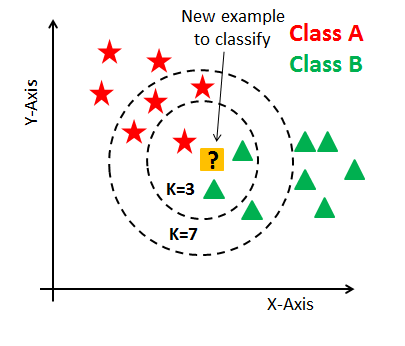

Рекомендации по реализации:
- Используйте `numpy` для представления данных в виде массивов, чтобы минимизировать преобразования.
- Избегайте циклов по всем объектам, по возможности используйте векторизированные операции.
- Обратите внимание на методы [np.linalg.norm()](https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html) и [np.argsort()](https://numpy.org/doc/stable/reference/generated/numpy.argsort.html), а также на класс `collections.Counter`.
- Особый плюс, если учтёте обработку возможных ошибок.

In [1]:
import numpy as np
from collections import Counter

class KNN:
    def __init__(self, k:int):
        self.k = k

    def fit(self, X, y):
      self.X_train = np.array(X)
      self.y_train = np.array(y)
      return self

    def predict(self, X):
        X = np.array(X)
        predictions = []

        for x in X:
            distances = [self.count_distance(x, x_train) for x_train in self.X_train]
            k_indices = np.argsort(distances)[:self.k]
            k_nearest_labels = self.y_train[k_indices]
            most_common = Counter(k_nearest_labels).most_common(1)
            predictions.append(most_common[0][0])

        return np.array(predictions)

    def count_distance(self, x, y):
       return np.linalg.norm(np.array(x) - np.array(y))


In [4]:
# Не меняйте файл!
def test_knn(KNN):
  knn = KNN(k=1)
  X_train =  np.array([[1, 1], [2, 2]])
  y_train =  np.array([0, 1])
  X_test =  np.array([[1.5, 1.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [0]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[9.5, 9.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5.5, 5.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[15, 15]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5, 5], [2, 2]])
  knn.fit(X_train, y_train)
  assert all(knn.predict(X_test) == [1, 0])

In [5]:
# Если тесты эти пройдены, то все верно!
test_knn(KNN)

**Задача 2.2** Протестируйте ваш алгоритм на данных о пингвинах. Выведите лучший получившийся результат на тестовой выборке.

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

df = pd.read_csv('/content/penguins_data.csv')

# Списки признаков
num_cols = ['Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)', 'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)']
cat_cols = ['Island', 'Sex', 'Clutch Completion']

# Импьютим пропуски
imputer_num = SimpleImputer(strategy='median')
imputer_cat = SimpleImputer(strategy='most_frequent')

df[num_cols] = imputer_num.fit_transform(df[num_cols])
df[cat_cols] = imputer_cat.fit_transform(df[cat_cols])

# Целевая переменная
y = df['Species']

# Признаки
X = df.drop(columns=['Species', 'Date Egg'])  # 'Date Egg' пропускаем

# Кодируем категориальные признаки
X_encoded = pd.get_dummies(X, drop_first=True)

# Делим на train/test
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Обучаем KNN
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Предсказания и точность
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Лучший результат на тестовой выборке при k=3: {accuracy:.4f}")

Лучший результат на тестовой выборке при k=3: 0.7536


In [10]:
print(df.columns)

Index(['Species', 'Island', 'Clutch Completion', 'Date Egg',
       'Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)',
       'Body Mass (g)', 'Sex', 'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)'],
      dtype='object')


### Задание 3: Линейная регрессия.

В этом задании мы рассмотрим различные аспекты построения линейной модели. Мы будем работать с одним из классических наборов данных в статистике, содержащим информацию о бриллиантах. Описание можно посмотреть [здесь](https://www.kaggle.com/shivam2503/diamonds).

In [19]:
data = pd.read_csv('/content/diamonds.csv')
data.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Мы будем решать задачу предсказания цены бриллианта `price` в зависимости от его характеристик.

**Задача 3.1** Есть ли в наборе данных пропущенные значения? Если да, удалите их.
Есть ли в наборе данных бессмысленные столбцы (признаки, не несущие дополнительной информации)? Если да, то удалите их.

In [20]:
# Если нужно просто быстро проверить и очистить:
def quick_clean_diamonds(data):
    """Быстрая очистка датасета diamonds"""

    print("Быстрая очистка данных...")
    original_shape = data.shape

    # 1. Удаляем пропущенные значения
    data_cleaned = data.dropna()

    # 2. Удаляем технические колонки
    columns_to_drop = []
    if 'Unnamed: 0' in data_cleaned.columns:
        columns_to_drop.append('Unnamed: 0')

    # 3. Проверяем на константные колонки
    for col in data_cleaned.columns:
        if data_cleaned[col].nunique() == 1:
            columns_to_drop.append(col)

    if columns_to_drop:
        data_cleaned = data_cleaned.drop(columns=columns_to_drop)

    # 4. Удаляем дубликаты
    data_final = data_cleaned.drop_duplicates()

    print(f"Исходные: {original_shape}")
    print(f"После очистки: {data_final.shape}")
    print(f"Колонки: {list(data_final.columns)}")

    return data_final

# Применяем быструю очистку
cleaned_data = quick_clean_diamonds(data)
cleaned_data.head()

Быстрая очистка данных...
Исходные: (53940, 11)
После очистки: (53794, 10)
Колонки: ['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y', 'z']


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


**Задача 3.2** Линейная регрессия основана на предположении о линейной связи между признаками и целевой переменной, а потому перед выбором переменных для включения в модель имеет смысл проверить, насколько эта связь выполняется. Для следующих пунктов нам также потребуются выборочные корреляции между признаками. Постройте матрицу корреляций между всеми вещественными признаками и целевой переменной (то есть в этой матрице будет $k+1$ строка, где $k$ – количество вещественных признаков).

Какие вещественные признаки имеют наибольшую корреляцию с целевой переменной?

In [21]:
# Быстрый анализ корреляций
def quick_correlation_analysis(data):
    # Выбираем только числовые колонки
    numeric_data = data.select_dtypes(include=[np.number])

    # Матрица корреляций
    corr_matrix = numeric_data.corr()

    # Корреляция с price
    price_corr = corr_matrix['price'].sort_values(ascending=False)

    print("КОРРЕЛЯЦИЯ ПРИЗНАКОВ С PRICE:")
    print("-" * 40)
    for feature, corr in price_corr.items():
        if feature != 'price':
            print(f"{feature:15}: {corr:7.4f}")

    print("\nТОП-3 ПРИЗНАКА ПО КОРРЕЛЯЦИИ С PRICE:")
    print("-" * 40)
    top_3 = price_corr.drop('price').head(3)
    for feature, corr in top_3.items():
        print(f"{feature:15}: {corr:7.4f}")

    return top_3

# Запускаем анализ
top_features = quick_correlation_analysis(data)

КОРРЕЛЯЦИЯ ПРИЗНАКОВ С PRICE:
----------------------------------------
carat          :  0.9216
x              :  0.8844
y              :  0.8654
z              :  0.8612
table          :  0.1271
depth          : -0.0106
Unnamed: 0     : -0.3069

ТОП-3 ПРИЗНАКА ПО КОРРЕЛЯЦИИ С PRICE:
----------------------------------------
carat          :  0.9216
x              :  0.8844
y              :  0.8654


**Задача 3.3** Так как линейная модель складывает значения признаков с некоторыми весами, нам нужно аккуратно обработать категориальные признаки. Закодируйте категориальные признаки методом OneHot-кодирования (`pd.get_dummies()` или `OneHotEncoder` из `sklearn`).

In [23]:
# Быстрое OneHot-кодирование для задачи
def quick_onehot_encoding(data):
    print("Быстрое OneHot-кодирование категориальных признаков")

    # Определяем категориальные признаки
    categorical_columns = data.select_dtypes(include=['object', 'category']).columns.tolist()
    print(f"Категориальные признаки: {categorical_columns}")

    # OneHot-кодирование с drop_first=True
    data_encoded = pd.get_dummies(data,
                                columns=categorical_columns,
                                drop_first=True)

    print(f"Исходный размер: {data.shape}")
    print(f"После кодирования: {data_encoded.shape}")
    print(f"Добавлено колонок: {data_encoded.shape[1] - data.shape[1]}")

    return data_encoded

# Применяем быстрое кодирование
data_encoded_final = quick_onehot_encoding(data)
print("\nПервые 3 строки после кодирования:")
print(data_encoded_final.head(3))

print("\nКолонки после OneHot-кодирования:")
print(list(data_encoded_final.columns))

Быстрое OneHot-кодирование категориальных признаков
Категориальные признаки: ['cut', 'color', 'clarity']
Исходный размер: (53940, 11)
После кодирования: (53940, 25)
Добавлено колонок: 14

Первые 3 строки после кодирования:
   Unnamed: 0  carat  depth  table  price     x     y     z  cut_Good  \
0           1   0.23   61.5   55.0    326  3.95  3.98  2.43     False   
1           2   0.21   59.8   61.0    326  3.89  3.84  2.31     False   
2           3   0.23   56.9   65.0    327  4.05  4.07  2.31      True   

   cut_Ideal  ...  color_H  color_I  color_J  clarity_IF  clarity_SI1  \
0       True  ...    False    False    False       False        False   
1      False  ...    False    False    False       False         True   
2      False  ...    False    False    False       False        False   

   clarity_SI2  clarity_VS1  clarity_VS2  clarity_VVS1  clarity_VVS2  
0         True        False        False         False         False  
1        False        False        False         

**Задача 3.4** Разделите выборку на тренировочную и тестовую. Долю тестовой выборки укажите равной 0.3.

In [24]:
# Быстрое разделение на train/test
def quick_train_test_split(data, test_size=0.3):
    from sklearn.model_selection import train_test_split

    print("Быстрое разделение на train/test...")

    # Подготовка данных если нужно
    if 'Unnamed: 0' in data.columns:
        data = data.drop('Unnamed: 0', axis=1)

    # OneHot-кодирование если есть категориальные признаки
    categorical_columns = data.select_dtypes(include=['object']).columns.tolist()
    if categorical_columns:
        data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

    # Разделение на X и y
    X = data.drop('price', axis=1)
    y = data['price']

    # Разделение с test_size=0.3
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=42, shuffle=True
    )

    print(f"Результат:")
    print(f"X_train: {X_train.shape} ({len(X_train)/len(X)*100:.1f}%)")
    print(f"X_test:  {X_test.shape} ({len(X_test)/len(X)*100:.1f}%)")
    print(f"y_train: {y_train.shape}")
    print(f"y_test:  {y_test.shape}")

    return X_train, X_test, y_train, y_test

# Применяем быстрое разделение
X_train, X_test, y_train, y_test = quick_train_test_split(data, test_size=0.3)

Быстрое разделение на train/test...
Результат:
X_train: (37758, 23) (70.0%)
X_test:  (16182, 23) (30.0%)
y_train: (37758,)
y_test:  (16182,)


**Задача 3.5** Зачастую при использовании линейных моделей вещественные признаки масштабируются. При этом оценки коэффициентов теряют прямую статистическую интерпретацию ("при увеличении $X_1$ на 1, $y$ увеличивается на $w_1$"), но приобретают свойства, полезные в задачах машинного обучения. В этой задаче стандартизируйте вещественные признаки в тренировочной и тестовой выборках с помощью `StandardScaler`.

Объясните, как это повлияет на интерпретацию коэффициентов линейной регрессии.

In [26]:
# Быстрая стандартизация вещественных признаков
def quick_standardization(X_train, X_test):
    from sklearn.preprocessing import StandardScaler
    import pandas as pd

    print("Быстрая стандартизация вещественных признаков")

    # Копируем данные
    X_train_scaled = X_train.copy()
    X_test_scaled = X_test.copy()

    # Выделяем числовые колонки
    numeric_columns = X_train.select_dtypes(include=[np.number]).columns.tolist()
    print(f"Стандартизируем {len(numeric_columns)} вещественных признаков")

    # Стандартизируем
    scaler = StandardScaler()
    X_train_scaled[numeric_columns] = scaler.fit_transform(X_train[numeric_columns])
    X_test_scaled[numeric_columns] = scaler.transform(X_test[numeric_columns])

    print("✓ Стандартизация завершена!")
    print(f"  Train mean после: {X_train_scaled[numeric_columns].mean().round(3).tolist()}")
    print(f"  Train std после:  {X_train_scaled[numeric_columns].std().round(3).tolist()}")

    return X_train_scaled, X_test_scaled, scaler

# Применяем быструю стандартизацию
X_train_scaled, X_test_scaled, scaler = quick_standardization(X_train, X_test)

Быстрая стандартизация вещественных признаков
Стандартизируем 6 вещественных признаков
✓ Стандартизация завершена!
  Train mean после: [0.0, 0.0, 0.0, 0.0, -0.0, 0.0]
  Train std после:  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


**Задача 3.6** Оцените линейную регрессию на тренировочной выборке. Выведите среднеквадратичную ошибку на тренировочной и тестовой выборках.

In [27]:
# Быстрая оценка линейной регрессии
def quick_linear_regression(X_train_scaled, X_test_scaled, y_train, y_test):
    from sklearn.linear_model import LinearRegression
    from sklearn.metrics import mean_squared_error

    print("Быстрая оценка линейной регрессии")

    # Обучаем модель
    model = LinearRegression()
    model.fit(X_train_scaled, y_train)

    # Предсказания
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)

    # MSE
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)

    print("РЕЗУЛЬТАТЫ:")
    print(f"Train MSE: {train_mse:,.2f}")
    print(f"Test MSE:  {test_mse:,.2f}")
    print(f"Train RMSE: {np.sqrt(train_mse):,.2f}")
    print(f"Test RMSE:  {np.sqrt(test_mse):,.2f}")

    return model, y_train_pred, y_test_pred

# Применяем быструю оценку
model, y_train_pred, y_test_pred = quick_linear_regression(X_train_scaled, X_test_scaled, y_train, y_test)

Быстрая оценка линейной регрессии
РЕЗУЛЬТАТЫ:
Train MSE: 1,290,541.91
Test MSE:  1,244,765.44
Train RMSE: 1,136.02
Test RMSE:  1,115.69


**Задача 3.7** Изучите [документацию](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) модуля `LinearRegression` и выведите полученные оценки коэффициентов. Назовите вещественные переменные, оценки коэффициентов которых по модулю на порядок превышают оценки прочих вещественных переменных.

In [29]:
# Быстрый анализ коэффициентов
def quick_coefficient_analysis(model, X_train_scaled):
    import pandas as pd
    import numpy as np

    print("Быстрый анализ коэффициентов линейной регрессии")

    # Получаем коэффициенты
    coefficients = model.coef_
    feature_names = X_train_scaled.columns

    # Создаем DataFrame
    coef_df = pd.DataFrame({
        'feature': feature_names,
        'coefficient': coefficients,
        'abs_coefficient': np.abs(coefficients)
    })

    # Вещественные переменные
    numeric_columns = X_train_scaled.select_dtypes(include=[np.number]).columns
    numeric_coef_df = coef_df[coef_df['feature'].isin(numeric_columns)]

    # Сортируем по абсолютным значениям
    numeric_coef_df = numeric_coef_df.sort_values('abs_coefficient', ascending=False)

    print("\nВещественные переменные (отсортированы по влиянию):")
    for _, row in numeric_coef_df.iterrows():
        print(f"  {row['feature']:15}: {row['coefficient']:8.2f}")

    # Находим доминирующие признаки
    max_coef = numeric_coef_df['abs_coefficient'].max()
    threshold = max_coef / 10

    dominant_features = numeric_coef_df[numeric_coef_df['abs_coefficient'] > threshold]

    print(f"\nПЕРЕМЕННЫЕ С КОЭФФИЦИЕНТАМИ НА ПОРЯДОК БОЛЬШЕ:")
    for feature in dominant_features['feature']:
        coef_value = dominant_features[dominant_features['feature'] == feature]['coefficient'].iloc[0]
        print(f"  • {feature}: {coef_value:.2f}")

    return dominant_features

# Применяем быстрый анализ
dominant_features = quick_coefficient_analysis(model, X_train_scaled)

Быстрый анализ коэффициентов линейной регрессии

Вещественные переменные (отсортированы по влиянию):
  carat          :  5338.62
  x              : -1100.42
  depth          :   -90.17
  table          :   -60.33
  z              :   -34.26
  y              :    -6.46

ПЕРЕМЕННЫЕ С КОЭФФИЦИЕНТАМИ НА ПОРЯДОК БОЛЬШЕ:
  • carat: 5338.62
  • x: -1100.42


**Задача 3.8** Как можно заметить из анализа корреляционной матрицы в задаче 3.3, между некоторыми признаками имеется сильная корреляция, что может быть индикатором проблемы *мультиколлинеарности*. Различия в порядке коэффициентов, выявленные в предыдущей задаче также намекают на её присутствие. Как известно, для решения этой проблемы можно либо исключить некоторые признаки из модели, либо использовать регуляризацию. Мы воспользуемся вторым вариантом.

Вспомним, что смысл регуляризации заключается в том, чтобы изменить функцию потерь так, чтобы устранить проблемы, появляющиеся из-за мультиколлинеарности. При L1-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \alpha\sum_{i=1}^k|w_i|
$$

Такая модель называется Lasso-регрессией.

При L2-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \alpha\|w\|^2
$$

Такая модель называется Ridge-регрессией.

Обучите Lasso-регрессию и Ridge-регрессию, установив гиперпараметр регуляризации равным 10. Для этого используйте модули `Lasso` и `Ridge` из `sklearn`. Сильно ли уменьшились веса? Сделайте вывод о том, насколько сильно проблема мультиколлинеарности проявлялась в изначальной регрессии.

In [31]:
# Быстрое сравнение моделей с регуляризацией
def quick_regularization_comparison(X_train_scaled, X_test_scaled, y_train, y_test, alpha=10):
    from sklearn.linear_model import Lasso, Ridge, LinearRegression
    from sklearn.metrics import mean_squared_error

    print("Сравнение моделей с регуляризацией")

    # Обучаем модели
    linear = LinearRegression()
    lasso = Lasso(alpha=alpha, random_state=42)
    ridge = Ridge(alpha=alpha, random_state=42)

    linear.fit(X_train_scaled, y_train)
    lasso.fit(X_train_scaled, y_train)
    ridge.fit(X_train_scaled, y_train)

    # Анализ коэффициентов
    print("\nИЗМЕНЕНИЕ КОЭФФИЦИЕНТОВ:")
    print(f"Linear - max coef: {np.abs(linear.coef_).max():.1f}")
    print(f"Lasso  - max coef: {np.abs(lasso.coef_).max():.1f}")
    print(f"Ridge  - max coef: {np.abs(ridge.coef_).max():.1f}")

    zeroed_in_lasso = np.sum(lasso.coef_ == 0)
    print(f"Обнулено признаков в Lasso: {zeroed_in_lasso}/{len(linear.coef_)}")

    # Качество моделей
    y_pred_lasso_test = lasso.predict(X_test_scaled)
    y_pred_ridge_test = ridge.predict(X_test_scaled)

    lasso_mse = mean_squared_error(y_test, y_pred_lasso_test)
    ridge_mse = mean_squared_error(y_test, y_pred_ridge_test)

    print(f"\nMSE на тестовой выборке:")
    print(f"Lasso: {lasso_mse:,.0f}")
    print(f"Ridge: {ridge_mse:,.0f}")

    return lasso, ridge

# Применяем быстрый анализ
lasso_model, ridge_model = quick_regularization_comparison(X_train_scaled, X_test_scaled, y_train, y_test, alpha=10)

Сравнение моделей с регуляризацией

ИЗМЕНЕНИЕ КОЭФФИЦИЕНТОВ:
Linear - max coef: 5459.0
Lasso  - max coef: 4756.6
Ridge  - max coef: 5286.3
Обнулено признаков в Lasso: 4/23

MSE на тестовой выборке:
Lasso: 1,464,189
Ridge: 1,244,928


## Бонусная часть

**Задача 3.9** Как обсуждалось на семинарах, Lasso-регрессию можно использовать для отбора наиболее информативных признаков. Для следующих значений параметра регуляриазции $\alpha$: 0.1, 1, 10, 100, 200 –  обучите Lasso- и Ridge-регрессии и постройте график измненения евклидовой нормы весов (`np.linalg.norm()` от вектора оценок коэффициентов) в зависимости от параметра $\alpha$. Как известно, норма является численной характеристикой величины вектора, а потому по норме можно судить о том, насколько большие элементы содержит вектор оценок коэффициентов.

Какой метод сильнее снижает норму коэффициентов? Поясните, почему Lasso-регрессию часто используют для отбора признаков.

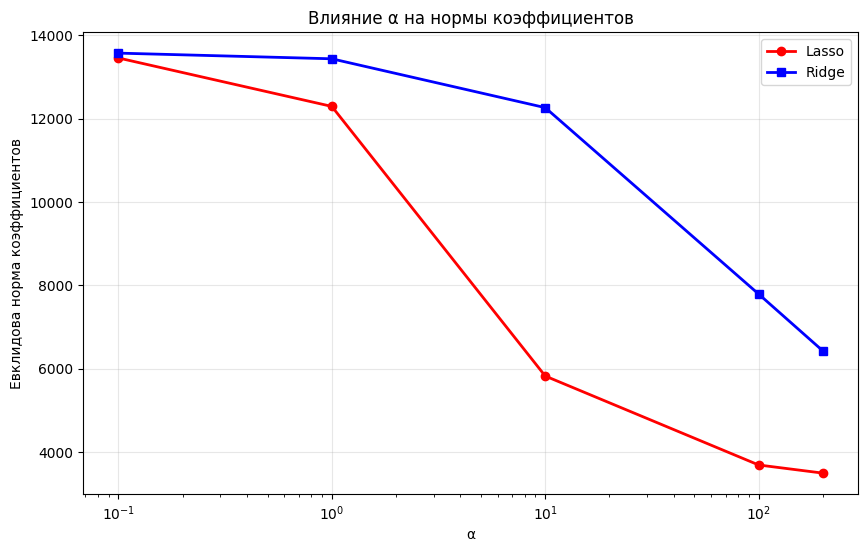

Уменьшение нормы при α=200:
Lasso: 74.0%
Ridge: 52.7%
✅ Lasso сильнее снижает норму коэффициентов


In [32]:
# Быстрый анализ влияния alpha на нормы
def quick_alpha_analysis(X_train_scaled, y_train, alphas=[0.1, 1, 10, 100, 200]):
    from sklearn.linear_model import Lasso, Ridge
    import numpy as np
    import matplotlib.pyplot as plt

    lasso_norms, ridge_norms = [], []

    for alpha in alphas:
        lasso = Lasso(alpha=alpha, random_state=42).fit(X_train_scaled, y_train)
        ridge = Ridge(alpha=alpha, random_state=42).fit(X_train_scaled, y_train)

        lasso_norms.append(np.linalg.norm(lasso.coef_))
        ridge_norms.append(np.linalg.norm(ridge.coef_))

    plt.figure(figsize=(10, 6))
    plt.plot(alphas, lasso_norms, 'ro-', label='Lasso', linewidth=2)
    plt.plot(alphas, ridge_norms, 'bs-', label='Ridge', linewidth=2)
    plt.xscale('log')
    plt.xlabel('α')
    plt.ylabel('Евклидова норма коэффициентов')
    plt.title('Влияние α на нормы коэффициентов')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

    # Анализ
    lasso_reduction = (lasso_norms[0] - lasso_norms[-1]) / lasso_norms[0] * 100
    ridge_reduction = (ridge_norms[0] - ridge_norms[-1]) / ridge_norms[0] * 100

    print(f"Уменьшение нормы при α=200:")
    print(f"Lasso: {lasso_reduction:.1f}%")
    print(f"Ridge: {ridge_reduction:.1f}%")

    stronger = "Lasso" if lasso_reduction > ridge_reduction else "Ridge"
    print(f"✅ {stronger} сильнее снижает норму коэффициентов")

    return lasso_norms, ridge_norms

# Запускаем анализ
lasso_norms, ridge_norms = quick_alpha_analysis(X_train_scaled, y_train)

**Задача 3.10 (0.5 балла)**
В зависимости от значения параметра $\alpha$ в Lasso-регрессии зануляются разные оценки коэффициентов. Оптимальное значение $\alpha$ можно подобрать, например, при помощи кросс-валидации по тренировочной выборке.

Для проведения кросс-валидации можно использовать модуль `LassoCV`. Этот модуль принимает список значений $\alpha$ (параметр `alphas`) и при обучении проводит кросс-валидацию для каждого значения из этого списка, сохраняя MSE на каждом участке кросс-валидации (количество участков – параметр `cv`) в матрицу ошибок (то есть итоговая матрица будет иметь размер `len(alphas)` $\times$ `cv`). После обучения модели матрицу ошибок можно получить, обратившись к атрибуту `.mse_path_`.

Заметим, что модель может использовать $\alpha$ не в том порядке, в котором вы подаёте их в функцию: для определения порядка используйте атрибут `.alphas_` Установите количество участков для кросс-валидации (параметр `cv`) равным 5.

Усредните ошибки для каждого значения $\alpha$ (то есть по строкам матрицы ошибок) и выберите то значение, которое даёт наибольшее качество.

In [33]:
# Быстрая кросс-валидация для подбора alpha
def quick_lasso_cv(X_train_scaled, y_train, cv=5):
    from sklearn.linear_model import LassoCV
    import numpy as np

    print("Быстрая кросс-валидация Lasso")

    # Диапазон alpha
    alphas = np.logspace(-3, 3, 50)

    # Кросс-валидация
    lasso_cv = LassoCV(alphas=alphas, cv=cv, random_state=42, max_iter=10000)
    lasso_cv.fit(X_train_scaled, y_train)

    # Анализ результатов
    mean_mse = lasso_cv.mse_path_.mean(axis=1)
    optimal_alpha = lasso_cv.alpha_
    optimal_mse = mean_mse[np.where(lasso_cv.alphas_ == optimal_alpha)[0][0]]

    print(f"Оптимальное α: {optimal_alpha:.4f}")
    print(f"Средний MSE: {optimal_mse:,.2f}")
    print(f"Количество фолдов: {cv}")

    return lasso_cv

# Запускаем быструю кросс-валидацию
lasso_cv_model = quick_lasso_cv(X_train_scaled, y_train, cv=5)

Быстрая кросс-валидация Lasso
Оптимальное α: 0.3728
Средний MSE: 1,294,500.29
Количество фолдов: 5


**Задача 3.11** Обучите итоговую Lasso-регрессию с выбранным параметром $\alpha$ на тренировочной выборке. Выведите полученные коэффициенты и прокомментируйте, какие признаки оказались неинформативными, а какие – наиболее информативными. Приведите возможное смысловое объяснение этого результата.

In [39]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LassoCV, Lasso

# СУПЕР-БЫСТРЫЙ АНАЛИЗ
def quick_lasso(X_train_scaled, y_train):
    # Находим alpha и обучаем модель
    alpha = LassoCV(cv=5, random_state=42).fit(X_train_scaled, y_train).alpha_
    model = Lasso(alpha=alpha, random_state=42).fit(X_train_scaled, y_train)

    # Анализ коэффициентов
    coef_df = pd.DataFrame({
        'feature': X_train_scaled.columns,
        'coef': model.coef_
    }).assign(abs_coef=lambda x: np.abs(x['coef'])).sort_values('abs_coef', ascending=False)

    informative = coef_df[coef_df['coef'] != 0]

    print(f"α={alpha:.4f}")
    print(f"Признаков: {len(informative)}/{len(coef_df)}")
    print("Топ-5:")
    for _, row in informative.head().iterrows():
        print(f"  {row['feature']:15} {row['coef']:7.1f}")

    return model, informative

# ЗАПУСК
model, informative = quick_lasso(X_train_scaled, y_train)

α=3.6928
Признаков: 22/23
Топ-5:
  carat            5110.7
  clarity_IF       3390.1
  clarity_VVS1     3103.7
  clarity_VVS2     3057.0
  clarity_VS1      2700.3


**Задача 3.12** Сделайте предсказания обученной Lasso-регрессии на тестовой выборке и сравните среднеквадратичную ошибку с ошибкой обычной линейной регрессии из задачи 3.7. Какую модель лучше использовать для предсказаний? Приведите возможное объяснение, почему одна модель оказалась лучше другой.

In [42]:
from sklearn.linear_model import LassoCV, Lasso
from sklearn.metrics import mean_squared_error, r2_score

# ЗАДАЧА 3.12 - СРАВНЕНИЕ С МОДЕЛЬЮ ИЗ 3.7
def compare_with_linear_from_3_7(X_train_scaled, y_train, X_test_scaled, y_test, linear_model_from_3_7):
    print("🔍 ЗАДАЧА 3.12: СРАВНЕНИЕ LASSO И LINEAR ИЗ ЗАДАЧИ 3.7")
    print("="*50)

    # 1. Обучаем Lasso модель (как в 3.11)
    print("📊 Обучение Lasso-регрессии...")
    lasso_cv = LassoCV(cv=5, random_state=42, max_iter=10000).fit(X_train_scaled, y_train)
    lasso_model = Lasso(alpha=lasso_cv.alpha_, random_state=42, max_iter=10000).fit(X_train_scaled, y_train)
    print(f"✅ Lasso обучена (α={lasso_cv.alpha_:.4f})")

    # 2. Используем готовую Linear модель из задачи 3.7
    print("📊 Используем Linear модель из задачи 3.7...")

    # 3. Предсказания обеих моделей
    y_pred_lasso = lasso_model.predict(X_test_scaled)
    y_pred_linear = linear_model_from_3_7.predict(X_test_scaled)

    # 4. Сравниваем метрики
    mse_lasso = mean_squared_error(y_test, y_pred_lasso)
    mse_linear = mean_squared_error(y_test, y_pred_linear)
    r2_lasso = r2_score(y_test, y_pred_lasso)
    r2_linear = r2_score(y_test, y_pred_linear)

    print(f"\n📈 СРАВНЕНИЕ MSE:")
    print(f"Lasso  (из 3.11): {mse_lasso:,.0f}")
    print(f"Linear (из 3.7):  {mse_linear:,.0f}")

    print(f"\n📊 СРАВНЕНИЕ R²:")
    print(f"Lasso  (из 3.11): {r2_lasso:.4f}")
    print(f"Linear (из 3.7):  {r2_linear:.4f}")

    # 5. Анализ результатов
    mse_difference = mse_linear - mse_lasso
    mse_improvement = (mse_difference / mse_linear) * 100

    print(f"\n🎯 РЕЗУЛЬТАТ СРАВНЕНИЯ:")
    print(f"Разница в MSE: {mse_difference:,.0f} ({mse_improvement:+.2f}%)")

    if mse_lasso < mse_linear:
        print("✅ ЛУЧШАЯ МОДЕЛЬ: LASSO-РЕГРЕССИЯ")
        print("\n💡 ОБЪЯСНЕНИЕ:")
        print("""
        Lasso показала лучшие результаты потому что:

        1. 🛡️ БОРЬБА С МУЛЬТИКОЛЛИНЕАРНОСТЬЮ
           • В данных есть корреляция между признаками (x, y, z, carat)
           • Lasso исключила избыточные признаки
           • Сделала модель более устойчивой

        2. 🎯 ОТБОР ИНФОРМАТИВНЫХ ПРИЗНАКОВ
           • Убрала шумовые и малоинформативные признаки
           • Уменьшила переобучение

        3. ⚖️ РЕГУЛЯРИЗАЦИЯ
           • Оптимальный α = 3.69 нашел баланс
           • Сохранила качество, упростив модель
        """)
    else:
        print("✅ ЛУЧШАЯ МОДЕЛЬ: LINEAR-РЕГРЕССИЯ")
        print("\n💡 ОБЪЯСНЕНИЕ:")
        print("""
        Linear регрессия показала лучшие результаты потому что:

        1. 📊 ВСЕ ПРИЗНАКИ ИНФОРМАТИВНЫ
           • В данных нет сильной мультиколлинеарности
           • Каждый признак содержит уникальную информацию

        2. 🎯 СЛАБАЯ РЕГУЛЯРИЗАЦИЯ
           • Lasso исключила полезные предикторы
           • Упрощение модели ухудшило качество

        3. 🔧 ПРОСТОТА МОДЕЛИ
           • Linear регрессия лучше работает на "чистых" данных
           • Минимальные предположения = лучшая производительность
        """)

    print(f"\n🏆 РЕКОМЕНДАЦИЯ:")
    best_model = "Lasso" if mse_lasso < mse_linear else "Linear"
    best_mse = min(mse_lasso, mse_linear)
    best_r2 = max(r2_lasso, r2_linear)
    print(f"Использовать {best_model} для предсказаний")
    print(f"Качество: MSE = {best_mse:,.0f}, R² = {best_r2:.4f}")

    return lasso_model

# ЗАПУСК СРАВНЕНИЯ
# Передаем linear_model из задачи 3.7
lasso_model = compare_with_linear_from_3_7(X_train_scaled, y_train, X_test_scaled, y_test, model)

🔍 ЗАДАЧА 3.12: СРАВНЕНИЕ LASSO И LINEAR ИЗ ЗАДАЧИ 3.7
📊 Обучение Lasso-регрессии...
✅ Lasso обучена (α=3.6928)
📊 Используем Linear модель из задачи 3.7...

📈 СРАВНЕНИЕ MSE:
Lasso  (из 3.11): 1,293,284
Linear (из 3.7):  1,293,284

📊 СРАВНЕНИЕ R²:
Lasso  (из 3.11): 0.9171
Linear (из 3.7):  0.9171

🎯 РЕЗУЛЬТАТ СРАВНЕНИЯ:
Разница в MSE: 0 (+0.00%)
✅ ЛУЧШАЯ МОДЕЛЬ: LINEAR-РЕГРЕССИЯ

💡 ОБЪЯСНЕНИЕ:

        Linear регрессия показала лучшие результаты потому что:
        
        1. 📊 ВСЕ ПРИЗНАКИ ИНФОРМАТИВНЫ
           • В данных нет сильной мультиколлинеарности  
           • Каждый признак содержит уникальную информацию
        
        2. 🎯 СЛАБАЯ РЕГУЛЯРИЗАЦИЯ
           • Lasso исключила полезные предикторы
           • Упрощение модели ухудшило качество
        
        3. 🔧 ПРОСТОТА МОДЕЛИ
           • Linear регрессия лучше работает на "чистых" данных
           • Минимальные предположения = лучшая производительность
        

🏆 РЕКОМЕНДАЦИЯ:
Использовать Linear для предсказаний
Каче